In [1]:
# Before we begin, let's just make sure you have everything you'll need:
import os, random
import numpy
try:
    from PIL import Image
except ImportError:
    try:
        import Image
    except ImportError:
        print "Warning: unable to import Image package; please run `pip install pillow`"
try:
    import scipy.ndimage
except ImportError:
    print ("Warning: unable to import scipy package; please install scipy"
           " or use a scientific Python distribution (such as Anaconda).")
for f in ['neuron.jpg', 'sweeps.csv']:
    if not os.path.isfile(f):
        print "Warning: can't find data file '%s'; some examples will not work." % f

# What is an array?

*Arrays* are a very useful concept shared by many programming languages. Arrays are:

1. Containers that hold many items, all of the same type. 
2. Represented by a rectangular structure. Arrays may have any number of dimensions, but each dimension (axis) of the array has a fixed length.

For example:

* A 1D array of 10M samples recorded from an electrode

<table style='margin-left: 50px'>
<!--<tr><td>0</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>&nbsp;&nbsp;.&nbsp;&nbsp;&nbsp;.&nbsp;&nbsp;&nbsp;.&nbsp;&nbsp;</td><td>9999999</td></tr>-->
<tr><td>0.0531</td><td>0.0547</td><td>0.0522</td><td>0.0525</td><td>0.0536</td><td>0.0531</td><td>&nbsp;&nbsp;.&nbsp;&nbsp;&nbsp;.&nbsp;&nbsp;&nbsp;.&nbsp;&nbsp;</td><td>0.0530</td></tr>
</table>

* A 5x5 (2D) matrix

<table style='margin-left: 50px'>
<tr><td>&nbsp;1&nbsp;</td><td>&nbsp;0&nbsp;</td><td>&nbsp;0&nbsp;</td><td>&nbsp;0&nbsp;</td><td>&nbsp;0&nbsp;</td></tr>
<tr><td>&nbsp;0&nbsp;</td><td>&nbsp;1&nbsp;</td><td>&nbsp;0&nbsp;</td><td>&nbsp;0&nbsp;</td><td>&nbsp;0&nbsp;</td></tr>
<tr><td>&nbsp;0&nbsp;</td><td>&nbsp;0&nbsp;</td><td>&nbsp;1&nbsp;</td><td>&nbsp;0&nbsp;</td><td>&nbsp;0&nbsp;</td></tr>
<tr><td>&nbsp;0&nbsp;</td><td>&nbsp;0&nbsp;</td><td>&nbsp;0&nbsp;</td><td>&nbsp;1&nbsp;</td><td>&nbsp;0&nbsp;</td></tr>
<tr><td>&nbsp;0&nbsp;</td><td>&nbsp;0&nbsp;</td><td>&nbsp;0&nbsp;</td><td>&nbsp;0&nbsp;</td><td>&nbsp;1&nbsp;</td></tr>
</table>

* A 500x500 pixel image with 3 color channels (3D)

<img src="files/rgb_array.svg" style="margin-left: 50px">

<br>
<div class="alert alert-block alert-warning">
https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html
</div>


## Why are arrays useful?

* They are fast
* They use memory efficiently
* Used correctly, they can make your code more concise

In principle, we could create multi-dimensional array-like structures simply by nesting Python lists together. In practice, this approach is tedious and inefficient.

As an example, let's try constructing a 2D array out of nested Python lists, and compare this approach to using NumPy arrays. 
I will build an "array" of random numbers that is 200 columns x 10k rows:


In [2]:
import random

rows = 50000
cols = 200

# Create a list that is 50,000 rows long, where each item in the list
# is a nested list of 200 random values.
awkward_array = []
for i in range(rows):
    row = []
    for j in range(cols):
        row.append(random.random())
    awkward_array.append(row)

    # display a small subset of this "array"
    if i < 10:
        print row[:5]

[0.7516484347446106, 0.7933597422525259, 0.3590668223160196, 0.4120205626367024, 0.6505600950521073]
[0.41411668044013317, 0.9384260945331401, 0.5573724350671906, 0.7388854636242623, 0.7835344215581656]
[0.5821875566760851, 0.7207972754634819, 0.748451619981291, 0.820719054370328, 0.06513585442519698]
[0.04507447872519099, 0.4295135494309704, 0.5665215390770065, 0.34693254842467514, 0.3549509131629023]
[0.40557768619336565, 0.9413985158797474, 0.8318248616167361, 0.9782428075486701, 0.8048425510519621]
[0.2333281574085967, 0.0847435614420805, 0.48782136444498014, 0.9341775837007713, 0.7552245927485715]
[0.3694915061591115, 0.6802971741296753, 0.3337304093137775, 0.709939710534133, 0.9851442170864438]
[0.34560996565994917, 0.1200870550496862, 0.466209455523924, 0.7496191392851289, 0.5292008151079197]
[0.7722944693945049, 0.3598696809628943, 0.7218843405464794, 0.392832452835141, 0.3470262080522659]
[0.19313338159298876, 0.47554369293374954, 0.0831909244275637, 0.3142581575659932, 0.1610

--------------------------------

Now I want to calculate the mean value of every column:


In [3]:
# For each column, collect all values in the column and then compute the average.
meanvals = []
for j in range(cols):
    col = [row[j] for row in awkward_array]
    meanvals.append(sum(col) / rows)
    
print meanvals[:5]

[0.5009993482311774, 0.498258035241072, 0.4998710079866637, 0.5004726313059157, 0.497557713123795]


--------------------------------
This code works, but it is:

* Slow - Python lists can contain mixed data types. One consequence is that when we add up values in a column, Python has to check *each* value to make sure it is a numerical type that can be added to the running total. If the array is large, that overhead can add up quickly!

* Memory-inefficient - We should be able to represent this data set using `rows * cols = 2e6 numbers`, plus some small overhead. Python lists have about 1kB of memory overhead *per* *list*, which again can add up quickly. If your data just barely fits in memory, this will ruin your day.

* Verbose - this very simple task can be written much more compactly with the right tools.


## NumPy to the rescue

NumPy is a third-party Python package used by nearly every other package in the scientific Python stack. It provides a crucial data type--`ndarray`--that allows us to create and manipulate real multi-dimensional arrays. NumPy also provides optimized tools for performing many numerical computations on arrays.


In [4]:
import numpy as np

data = np.random.random(size=(rows, cols))
meanvals = data.mean(axis=0)
print meanvals[:5]

[ 0.49912978  0.50098571  0.50001026  0.50072551  0.50027779]


These three lines of code replace the 16 lines that it took to perform the same operation with lists, and it runs in a small fraction of the time. 

<br>
<div class="alert alert-block alert-warning">
https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.random.random.html<br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.mean.html
</div>

---------------------------

Let's explore the array object we just created:

In [5]:
# numpy arrays have a set number of dimensions:
data.ndim

2

In [6]:
# each dimension has a specific length
data.shape

(50000L, 200L)

In [7]:
# The total number of items in this array (200 * 50k) is given by the `size` attribute
data.size

10000000

In [8]:
# The array's memory usage is the number of items (200 * 50k)
# times the number of bytes used by each item
data.size * data.itemsize

80000000

<br>
This array uses 80MB of memory to represent 10M values. Why do we use 8 bytes for each item?

In [9]:
# all items in the array share the same data type
data.dtype

dtype('float64')

All elements in the array are of the same data type, a 64-bit (8 byte) floating-point number.

This is the default *dtype*, but there are many other options we can pick from. Whether we *care* enough to worry about dtype depends on what we want to do with the array, and whether we are likely to run out of memory. Some of the most commonly used dtypes are listed here:

| dtype  | bytes     | precision  | approx. range       |
|--------|-----------|------------|---------------------|
|float64 | 8         | 16         | ±10<sup>308</sup>   |
|float32 | 4         | 7          | ±10<sup>38</sup>    |
|int64   | 8         | 0          | ±10<sup>18</sup>    |
|int32   | 4         | 0          | ±10<sup>9</sup>     |
|int16   | 2         | 0          | ±10<sup>4</sup>     |
|uint64  | 8         | 0          | 0 to 10<sup>19</sup>|
|uint32  | 4         | 0          | 0 to 10<sup>9</sup> |
|uint16  | 2         | 0          | 0 to 10<sup>4</sup> |
|uint8   | 1         | 0          | 0-255               |
|bool    | 1         | 0          | 0-1                 |

<br>
<div class="alert alert-block alert-warning">
All dtypes: https://docs.scipy.org/doc/numpy-1.10.1/user/basics.types.html<br>
All ndarray attributes: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html
</div>

----------------------

To convert an array to a different dtype, use the *astype()* method.

In [10]:
smaller_data = data.astype('float32')

# This should be half the size of the original array
smaller_data.size * smaller_data.itemsize

40000000

## Creating new arrays

NumPy offers several mechanisms for creating new arrays. Let's look at a few of the more common approaches:

-----------------------

**Nested lists**

In [11]:
# Create an array from nested lists.
list_data = [[1,2], [3,4], [5,6], [7,8]]
arr1 = np.array(list_data)
print arr1

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [12]:
# `list_data` is a list of length 4, and each of its items is a nested list of length 2.
# This corresponds to an array shape (4, 2)
arr1.shape

(4L, 2L)

-------------------------
**zeros()**

In [13]:
# Create an array of a certain shape and dtype, filled with zeros
arr2 = np.zeros((5, 10), dtype='uint16')
print arr2
print "shape:", arr2.shape, "dtype:", arr2.dtype

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
shape: (5L, 10L) dtype: uint16


-------------------------
**arange()**

In [14]:
# Create a 1D array of consecutive integers 
print np.arange(5, 11)

[ 5  6  7  8  9 10]


-----------------------

**fromfunction()**

In [15]:
# Create an array and fill it with values generated by a function.
# For each element in the new array, the function will be called with the element's indices as its arguments.
def gauss(x, y, center=(5, 5), sigma=3.5):
    dist = ((x-center[0])**2 + (y-center[1])**2) ** 0.5
    return 100 * np.exp(-dist**2 / sigma)

arr3 = np.fromfunction(gauss, (10, 10))
print arr3.astype('int')  # convert to int for easier reading

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   2   5   7   5   2   0   0]
 [  0   0   2  10  23  31  23  10   2   0]
 [  0   0   5  23  56  75  56  23   5   0]
 [  0   1   7  31  75 100  75  31   7   1]
 [  0   0   5  23  56  75  56  23   5   0]
 [  0   0   2  10  23  31  23  10   2   0]
 [  0   0   0   2   5   7   5   2   0   0]
 [  0   0   0   0   0   1   0   0   0   0]]


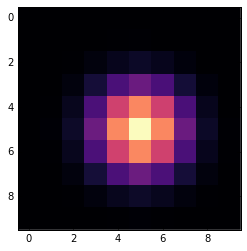

In [16]:
# let's visualize that array as an image
from matplotlib.pylab import imshow, plot, scatter
%matplotlib inline
imshow(arr3, interpolation='none', cmap='magma')


<br>
<div class="alert alert-block alert-warning">
https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html
</div>

-------------------


## Accessing single values from arrays

In [17]:
# Create a small array to play with
arr4 = np.array([[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15]])
print arr4

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


In [18]:
# To read a single value from the array, we index the array using [] notation
# and supply a comma-separated list of indices, one per axis
print arr4[2, 3]

14


In [19]:
# To change one value in the array:
arr4[1, 2] = -1
print arr4

[[ 1  2  3  4  5]
 [ 6  7 -1  9 10]
 [11 12 13 14 15]]


In [20]:
#######################  Exercise  #######################
#
# Create a new array and write a for-loop that sets each
# item equal to the corresponding item in `arr4` plus one.
# Put another way:
#     new_arr[i,j] == arr4[i, j] + 1

new_arr = np.zeros(arr4.shape, arr4.dtype)
for i in range(arr4.shape[0]):
    for j in range(arr4.shape[1]):
        new_arr[i, j] = arr4[i, j] + 1

print arr4
print new_arr

[[ 1  2  3  4  5]
 [ 6  7 -1  9 10]
 [11 12 13 14 15]]
[[ 2  3  4  5  6]
 [ 7  8  0 10 11]
 [12 13 14 15 16]]


<br>
<div class="alert alert-block alert-warning">
https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html
</div>

## Arithmetic with arrays

In the exercise above, you used a nested for-loop to access each element of an array, one at a time. This is fine for small arrays, but for large arrays we would be executing many Python statements, each of which has a significant performance cost. 

NumPy provides a way to express this operation (and many others) using a single Python statement:

In [21]:
# Start with a 1D array of integers 0 through 7
arr5 = np.arange(8)
print arr5

# Create a new array by adding 2 to each element of arr5
arr6 = arr5 + 2
print arr6

[0 1 2 3 4 5 6 7]
[2 3 4 5 6 7 8 9]


<br>
This process--replacing nested for-loops with array operations--is called *vectorization*. It both speeds up our code and makes it easier to read and write.

------------------------

It is also possible to modify an existing array in-place, rather than creating a new array:

In [22]:
# subtract 2 directly from each element in arr6; do not create a new array
arr6 -= 2
print arr6

[0 1 2 3 4 5 6 7]


<div class="alert alert-block alert-info">**Note:** most functions in numpy will either *create* and return a new array, or *modify* an existing array in-place. Keep track of which of these is happening in your code, and look for this whenever you read the documentation.</div>

In [23]:
#######################  Exercise  #######################
#
# Create a 1D array that contains (2^x - 1) for integer
# values of x from 0 to 10. For example, the first 3 items
# are:
#   2^0 - 1 = 0
#   2^1 - 1 = 1
#   2^2 - 1 = 3
# For this exercise, do not use for-loops or `fromfunction()`
#
#  Note: the exponent operator in Python is two asterisks: **

print 2**np.arange(11) - 1

[   0    1    3    7   15   31   63  127  255  511 1023]


We have just seen an example of arithmetic between an array and a scalar (single value). It is also possible to perform arithmetic element-wise between two arrays:

In [24]:
# Create a new array `arr7` where each item is the product of the corresponding items in `arr5` and `arr6`
arr7 = arr5 * arr6
print arr7

[ 0  1  4  9 16 25 36 49]


In [25]:
# We can do the same with arrays of any dimension
arr8 = np.array([[1, 2], [3, 4]])
arr9 = np.array([[10, 10], [20, 20]])
print arr8 * arr9

[[10 20]
 [60 80]]


<div class="alert alert-block alert-info">
Note: in the above example, the arrays are multiplied *elementwise*; this is not a dot-product!<br><br>

This is a frequent point of confusion for MATLAB users. Whereas MATLAB began life as a linear algebra system, NumPy was designed as a more general-purpose numerical computation system. For those interested in using NumPy for linear algebra, read about *numpy.matrix*, which provides a special type of *ndarrray* for this purpose.<br><br>

<div class="alert alert-block alert-warning">
https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html
</div>
</div>

**Boolean operations**

In addition to the arithmetic operators available with numpy arrays (+ - \* / \*\*), most boolean (true/false) and comparison operators may be used as well. As before, these operators are applied elementwise, returning an array of boolean values:

In [26]:
arr10 = np.arange(10)

# generate a boolean array that contains True wherever arr10 is greater than 5
arr11 = arr10 > 5
print arr11

[False False False False False False  True  True  True  True]


In [27]:
# Combine two boolean arrays using an elementwise OR operator:
print (arr10 < 3) | (arr10 > 7)

[ True  True  True False False False False False  True  True]


In [28]:
# Combine two boolean arrays using an elementwise AND operator:
print (arr10 > 3) & (arr10 < 7)

[False False False False  True  True  True False False False]


<br>
Later on, we will see how we can use boolean arrays like these to select (or mask) values from the original data.
<br><br>

**Other mathematical functions**

NumPy includes an extensive library of mathematical functions that operate on arrays. The full list can be found here:
https://docs.scipy.org/doc/numpy/reference/routines.math.html

Let's look at just a couple of the most commonly used functions:

In [29]:
# Generate an array containing e^x for several values of x
print np.exp(arr10)

[  1.00000000e+00   2.71828183e+00   7.38905610e+00   2.00855369e+01
   5.45981500e+01   1.48413159e+02   4.03428793e+02   1.09663316e+03
   2.98095799e+03   8.10308393e+03]


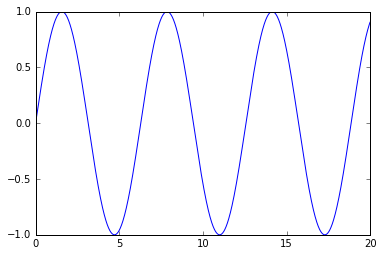

In [30]:
#######################  Exercise  #######################
#
# Show a plot of a sine wave. 
#
# Suggested strategy:
#  1. Create an array of time (or phase) values using  
#     np.arange() multiplied by a scale factor
#  2. Compute the sine of this array using np.sin()
#  3. Plot the result using plot(), which was previously
#     imported from matplotlib 

tvals = np.arange(1000) * 0.02
sinewave = np.sin(tvals)
plot(tvals, sinewave);

<br>
<div class="alert alert-block alert-warning">
https://docs.scipy.org/doc/numpy/reference/routines.math.html
</div>

## Accessing array sub-regions (slicing)

When dealing with arrays, it is common that we will want to select a specific sub-region of the array. This allows us to either extract a portion of the original data for focused analysis, or to modify a selected portion of the original array.

We can select a subregion of an array using indexing and slice notation, exactly as we would with a list:

In [31]:
# To start simple, let's just take a 1D array and slice it up a few different ways
arr12 = np.arange(20)
print arr12

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [32]:
# Take a slice from index 5 until 15
print arr12[5:15]

[ 5  6  7  8  9 10 11 12 13 14]


In [33]:
# Slice from the beginning until the 7th element
print arr12[:7]

[0 1 2 3 4 5 6]


In [34]:
# Slice from the 11th element until the end
print arr12[11:]

[11 12 13 14 15 16 17 18 19]


In [35]:
# Extract the last 5 elements
print arr12[-5:]

[15 16 17 18 19]


--------------------------
Note that when we slice an array, the original array is unchanged. However, the new array that we create is actually a *view* on the original array. No data is copied when the view is created. This means that modifications made to either array will be visible from both:

In [36]:
arr13 = arr12[5:15]

# modify these arrays
arr12[5] = -1
arr13[9] = -2

# both arrays are a view on the same underlying memory, and thus changes
# made to either one are apparent in both
print arr12
print arr13

[ 0  1  2  3  4 -1  6  7  8  9 10 11 12 13 -2 15 16 17 18 19]
[-1  6  7  8  9 10 11 12 13 -2]


This is the default behavior because it provides the best performance, although it requires some care on the part of the programmer to ensure data is not inadvertently modified. To avoid such unwanted side effects, it is sometimes necessary to copy an array before modifying it: 

In [37]:
# copy the array and discard the view
arr13 = arr13.copy()

# these two arrays are completely independent; changes made to one are not
# reflected in the other
arr12[14] = 14
arr13[0] = 5

print arr12
print arr13

[ 0  1  2  3  4 -1  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 5  6  7  8  9 10 11 12 13 -2]


-------------------
One major difference between lists and arrays is that we may index or slice multiple axes simultaneously:

In [38]:
# Start with a 3D array
arr14 = np.arange(6000).reshape(40, 50, 3)

# This array has shape (40, 50, 3). Let's take a slice that contains:
#  * all rows (along axis 0)
#  * columns 10-19 (along axis 1)
#  * only the second channel (along axis 2)
arr15 = arr14[:, 10:20, 1]

<div class="alert alert-block alert-info">
**Note:** When we **slice** an axis, the resulting array will have the same axis, but of a different length.
When we **index** an axis, that axis is no longer present in the result.
</div>

In [39]:
#######################  Exercise  #######################
#
# Try to guess what the shape of arr15 will be before
# running this cell
print arr15.shape

(40L, 10L)


------------------------
Another major difference between lists and arrays is that, with arrays, we can actually assign new values to a slice of the array:

In [40]:
arr16 = np.arange(18)

# Assign -1 to a block in the middle of arr16
arr16[7:12] = -1
print arr16

[ 0  1  2  3  4  5  6 -1 -1 -1 -1 -1 12 13 14 15 16 17]


In [41]:
# Assign an array to fill up the middle of arr16
arr16[7:12] = np.arange(107, 112)
print arr16

[  0   1   2   3   4   5   6 107 108 109 110 111  12  13  14  15  16  17]


In [42]:
# We can also do in-place arithmetic on array slices
arr16[7:12] *= -1
print arr16

[   0    1    2    3    4    5    6 -107 -108 -109 -110 -111   12   13   14
   15   16   17]


<br>
<div class="alert alert-block alert-warning">
https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html
</div>

------------------------------


## Array reduction

NumPy has many functions for performing mathematical operations on arrays. Earlier, we used *exp()* and *sin()* to create new arrays by performing these operations elementwise; that is, the output arrays had the same shape as their input arrays. 

Another group of mathematical functions takes an array as input and returns either a scalar or an array with one fewer dimension than the input. This process is called *reduction*.

### Reduction methods: **min()**, **max()**, **mean()**, and **std()**

The most common reductions are available as array methods 
(we access them by writing *data.method()* as opposed to *np.function(data)*)

In [43]:
# For this example, we will read a CSV file containing electrode recordings from
# a patch clamp experiment.
ephys_data = np.loadtxt("sweeps.csv", delimiter=",", skiprows=1)
print ephys_data.shape

(673L, 11L)


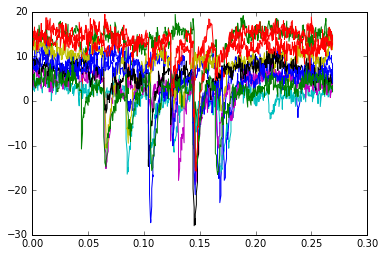

In [44]:
# The *data* array contains 11 columns. The first column contains time values, 
# and the rest contain electrode data recorded from 10 consecutive trials.

# Separate time values from the rest of the data
tvals = ephys_data[:, 0]
ephys_data = ephys_data[:, 1:]

# Plot all sweeps overlaid
plot(tvals, ephys_data);

In [45]:
# Print some statistics on the entire dataset 
print "min:", ephys_data.min(), "  max:", ephys_data.max(), "  mean:", ephys_data.mean(), "  stdev:", ephys_data.std()

min: -27.97   max: 19.391   mean: 6.70334175334   stdev: 6.38701069461


Mean of each recording: [  7.24741456  13.31140862  13.53353046   0.20036404   2.43981724
   7.96416642   5.298789     4.18689153   1.33420505  11.51683061]

Average values across all 10 recordings:


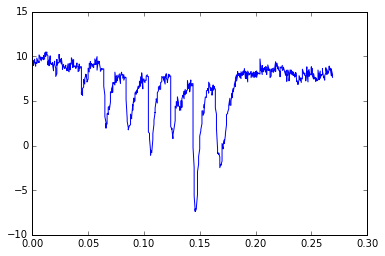

In [46]:
# If the array is multi-dimensional, we may optionally specify an *axis* over which the reduction should be applied.

# Compute the mean value from each recording
# (average all values along axis 0)
print "Mean of each recording:", ephys_data.mean(axis=0)

# For each time point, compute (and plot) the average values across all recordings
# (mean of all values along axis 1)
print "\nAverage values across all 10 recordings:"
plot(tvals, ephys_data.mean(axis=1));

### Reduction functions: **median()**, **sum()**, **argmin()**, and **argmax()**

In [47]:
# Only the most common reductions are available as array methods.
# Many more are regular functions defined in the numpy package
# (use np.function_name() to access them)
print "Median value of all samples up to 10ms:", np.median(ephys_data[:25])
print "Sum (area under curve) for each recording:", np.sum(ephys_data, axis=0)

Median value of all samples up to 10ms: 9.384
Sum (area under curve) for each recording: [ 4877.51   8958.578  9108.066   134.845  1641.997  5359.884  3566.085
  2817.778   897.92   7750.827]


In [48]:
# Another useful set of functions gives the _index_ within
# an array where certain features occur:
print "Minimum (peak) value of each recording occurs at indices", np.argmin(ephys_data, axis=0)
print "Minimum (peak) value of average recording occurs at t =", 0.4e-3 * np.argmin(ephys_data.mean(axis=1))

Minimum (peak) value of each recording occurs at indices [420 363 109 212 365 164 362 263 413 366]
Minimum (peak) value of average recording occurs at t = 0.1452


### **argwhere()**

In [49]:
# Whereas argmin() and argmax() return only a single index (or reduce input.ndim by 1), 
# argwhere() returns an *array* of indices where its input is True. This provides a more
# powerful tool for locating features within our data.
arr17 = np.array([
  [True, False, False, True, False],
  [False, False, True, False, False],
])
print arr17
print np.argwhere(arr17)


[[ True False False  True False]
 [False False  True False False]]
[[0 0]
 [0 3]
 [1 2]]


In [50]:
# argwhere() is most useful when combined with the boolean / comparison operators we saw earlier
np.argwhere(np.arange(10) > 7)

array([[8],
       [9]], dtype=int64)

<br>
<div class="alert alert-block alert-warning">
https://docs.scipy.org/doc/numpy/reference/routines.sort.html
</div>

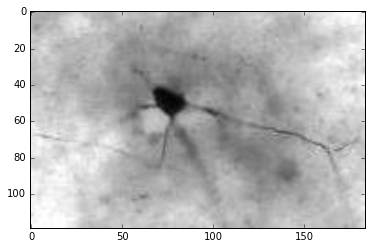

In [51]:
#######################  Exercise  #######################
#
# Load the image included with this notebook and use
# argwhere() to determine the cell body's center of mass.
#
# Hint: The pixels in the soma all have a value < 50
#
# Suggested strategy:
#  * Make a boolean array that is True wherever the image value is < 50
#  * Use argwhere to get the positions of all True values in the boolean array
#  * Average pixel locations to get the center of mass

img = Image.open("neuron.jpg")

# convert the image to an array and discard the blue/green channels
# (the image is greyscale anyway, so we don't need color)
img_data = np.array(img)[:, :, 0]

imshow(img_data, cmap='gray');

In [52]:
soma_pixels = np.argwhere(img_data < 50)
print "Center:", soma_pixels.mean(axis=0)

Center: [ 49.27388535  75.66242038]


This data is noisy! Where is the cell?


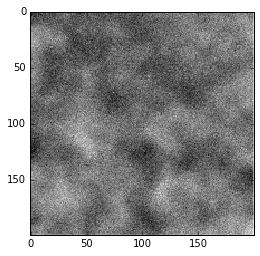

In [53]:
#######################  Exercise  #######################
#
# The code below creates a data set similar to a calcium 
# imaging experiment. The array is 3D (frame, x, y) and
# contains one small region (a "cell") where the brightness of
# the image fluctuates over time. 
#
# The purpose of this exercise is to generate a plot of
# the signal hidden in this region.
#
# Suggested approach:
# 1. Use data.std to measure the standard deviation of each
#    pixel over time
# 2. Display the stdev image with imshow to visually determine
#    the location of the cell
# 3. Slice out the region of the image around the cell
# 4. Take the average over each frame of the sliced data and 
#    plot it 


# Create one frame of static, low-frequency noise
from scipy.ndimage import gaussian_filter
noise = np.random.normal(size=(200, 200), loc=128, scale=40)
static = gaussian_filter(noise, 15) + 0.3 * gaussian_filter(noise, 5)

# Create full 3D array with static and time-varying noise
n_frames = 200
video_data = np.random.normal(size=(n_frames, 200, 200)) + static.reshape(1, 200, 200)

# Create random calcium transient signal
np.random.seed(0)  # this is added to keep the problem stable in the answer key.
sig = np.zeros(n_frames)
spike_times = np.random.randint(10, n_frames-10, size=6)
dt = 0.1  # let's say frames are collected at 10 Hz
tau = 0.5  # and calcium signals have a decay time constant of 0.5 sec
for spike in spike_times:
    sig[spike:] += 1.5 * np.exp(-np.arange(n_frames-spike)*dt / tau)

# Add calcium signal to a randomly-chosen region of the image
i,j = np.random.randint(10, video_data.shape[0]-10, size=2)
video_data[:, i:i+10, j:j+10] += sig.reshape(sig.shape[0], 1, 1)

# Show the first frame.
print "This data is noisy! Where is the cell?"
imshow(video_data[0], cmap='gray', interpolation='none');

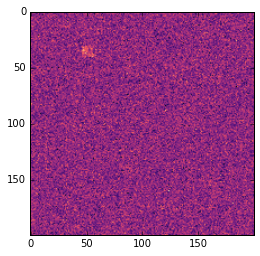

In [54]:
# Write your solution here (don't re-run the cell above lest you get a different randomly-generated dataset)
stdev = video_data.std(axis=0)
imshow(stdev, cmap='magma');

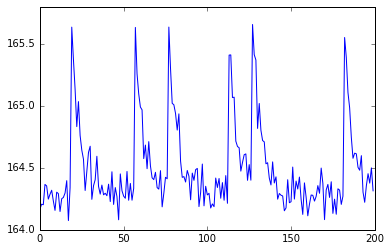

In [55]:
# Looks like the cell is at about (30:40, 45:55)
cell_data = video_data[:, 30:40, 45:55]

# Average over x,y axes to get signal
my_data = cell_data.mean(axis=2).mean(axis=1)

plot(my_data);

In [56]:
# Save your hard work!
np.save("my_data.npy", my_data)

# You could restore this array later on using np.load()
reloaded_data = np.load("my_data.npy")
if all(reloaded_data == my_data):
    print "Data was saved and verified!"

Data was saved and verified!


<br>
<div class="alert alert-block alert-info">
**Note:** np.save() is a quick-and-dirty solution for storing data, such as when
caching intermediate results in an extended analysis.
Because it uses a nonstandard format, it is not a great choice for archival
storage or data sharing. In those cases, consider something like CSV (np.savetxt)
or HDF5 (via the 3rd-party h5py package).
</div>

<br>
<div class="alert alert-block alert-warning">
https://docs.scipy.org/doc/numpy/reference/routines.io.html<br>
http://docs.h5py.org/en/latest/quick.html
</div>


## Masking and fancy indexing

NumPy provides slicing and indexing as simple ways to extract or modify a subset of your data. But what if the subset we want is more complex (not rectangular)? Here we will learn two ways to extract or modify an arbitrary set of items from an array.

### Masking with boolean arrays

The most common way of selecting an arbitrary set from an array is with boolean masking. The idea here is to create a boolean (true/false) array that has the same shape as your data, and contains the value True only in the locations of items you are interested in.

In [57]:
# let's start with a simple array
arr18 = np.arange(10, dtype='float')

# make a mask that selects all locations where arr18 is > 6 or < 2
mask = (arr18 > 6) | (arr18 < 2)

print arr18
print mask

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[ True  True False False False False False  True  True  True]


In [58]:
# Now the fun part: let's see only the selected values
print arr18[mask]

[ 0.  1.  7.  8.  9.]


In [59]:
# We can also selectively modify these values
arr18[mask] = np.nan
print arr18

[ nan  nan   2.   3.   4.   5.   6.  nan  nan  nan]


In [60]:
# NaN (not-a-number) values appear in many kinds of data.
# One common use for boolean masking is to remove NaN values from your data before
# analyzing it:
mask = np.isfinite(arr18)
print arr18[mask]
print arr18[mask].mean()

[ 2.  3.  4.  5.  6.]
4.0


<br>
<div class="alert alert-block alert-warning">
https://docs.scipy.org/doc/numpy/user/basics.indexing.html#boolean-or-mask-index-arrays
</div>

### Fancy indexing

Another powerful way to select items from an array is by specifying the exact set of indices you would like to extract. This is called "fancy indexing" (It's also called "array indexing with index arrays", but I prefer "fancy"):

In [61]:
# Again, start with a simple array:
arr19 = np.arange(100, 110)

# let's say I have an array containing the indices that I want to extract from arr19:
indices = np.array([1,5,2,3,2,6,6,0])

# Extracting values from arr19 gives:
print arr19[indices]

[101 105 102 103 102 106 106 100]


Notice that with fancy indexing, you can select values from the input array multiple times and in any order.

This feature is used, for example, to implement lookup tables.

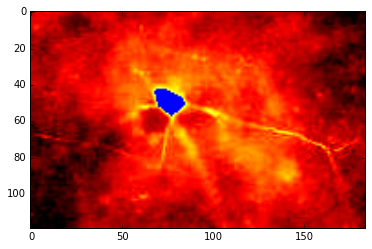

In [62]:
# Load the neuron image again and display it with color derived from a lookup table
img = Image.open("neuron.jpg")
img_data = np.array(img)[:, :, 0]

# Construct a lookup table of RGB color values that transition from 
#   white -> yellow -> red -> black
lut = np.zeros((256, 3), dtype='ubyte')
ind = np.arange(255, -1, -1)
lut[:,0] = np.clip(ind*3, 0, 255)
lut[:,1] = np.clip(ind*3-256, 0, 255)
lut[:,2] = np.clip(ind*3-512, 0, 255)

# Replace everything < 50 (just the soma in this case) with blue
lut[:50] = (0, 0, 255)

# Create an RGB-colored image by using each value in *img_data* as an index
# to look up the corresponding color in *lut*
color_data = lut[img_data]

imshow(color_data)

In [63]:
#######################  Exercise  #######################
#
# Calcluate the average value of the pixels both inside
# and outside the cell body. 

mask = img_data < 50
print "Average value inside soma:", img_data[mask].mean()
print "Average value outside soma:", img_data[~mask].mean()


Average value inside soma: 24.9681528662
Average value outside soma: 181.450434703


<br>
<div class="alert alert-block alert-warning">
https://docs.scipy.org/doc/numpy/user/basics.indexing.html#index-arrays
</div>


## Array concatenation / stacking

Let's say we have two (or more) arrays that we would like to combine together into a single array. Numpy provides several functions  that accomplish this task in different ways, but let's just focus on the most general ones: *concatenate()* and *stack()*. This function takes a list of arrays and stacks them together along any axis. 

The rules of concatenation are:

* All arrays must have the same number of dimensions (you can create new dimensions of length-1 if needed)
* All arrays must have the same shape *except* along the concatenation axis


In [64]:
# Start with two arrays
arr20 = np.arange(5)
arr21 = np.arange(100, 105)

# concatenate these along axis 0
concat = np.concatenate([arr20, arr21])

print concat

[  0   1   2   3   4 100 101 102 103 104]


In [65]:
# now stack the arrays across a new axis
stacked = np.stack([arr20, arr21], axis=0)
print stacked

[[  0   1   2   3   4]
 [100 101 102 103 104]]


In [66]:
# Can I add another row to *stacked* ?
arr22 = np.arange(200, 205)

# Yes, but I need to make sure that my arrays have the same number of dimensions!
# *stacked* is 2D, whereas *arr22* is only 1D. I need to reshape it to become 2D:
arr22_2d = arr22.reshape(1, 5)
print np.concatenate([stacked, arr22_2d], axis=0)

[[  0   1   2   3   4]
 [100 101 102 103 104]
 [200 201 202 203 204]]


<br>
<div class="alert alert-block alert-warning">
https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html
</div>

-----------------------

## Broadcasting

We have seen many cases where we perform an operation elementwise between two arrays. For example:

```
    # add two arrays together
    arr1 + arr2
    
    # compare two arrays
    arr1 > arr2
    
    # assign from one array to another
    arr1[:,0] = arr2
```

In each of these cases, the two arrays being operated on had the same shape--each element in one array had a matching element in the other array. 

Broadcasting is a very powerful feature of NumPy that lets us perform operations between two arrays of different shape.


Raw data:


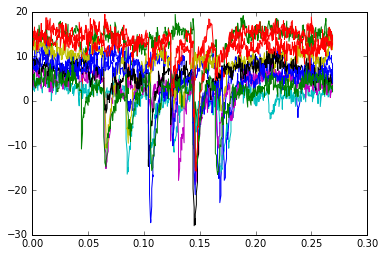

In [67]:
# Simple example: Let's take the same electrode recording data that we
# loaded earlier and subtract off the baseline value from each recording
ephys_data = np.loadtxt("sweeps.csv", delimiter=",", skiprows=1)
tvals = ephys_data[:,0]
ephys_data = ephys_data[:, 1:]

print "Raw data:"
plot(tvals, ephys_data);

Baseline-subtracted data:


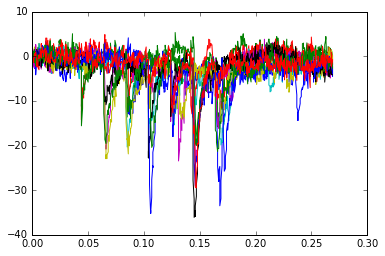

In [68]:
# calculate the median value from the beginning (first 25 samples) of each recording
base_vals = np.median(ephys_data[:25], axis=0)

# reshape base_vals so that it is clear how the axes of *base_vals* align with *data*
base_vals = base_vals.reshape(1, 10)

# subtract baseline values from data
baseline_subtracted = ephys_data - base_vals

print "Baseline-subtracted data:"
plot(tvals, baseline_subtracted);

Notice that we had to reshape *base_vals* to become 2D before it could be subtracted from *ephys_data*.
When *base_vals* is broadcast onto *ephys_data*, its first axis (which has length 1) is effectively stretched
to the full length of *ephys_data*'s first axis (which has length 673). 

The major rules here are: 

* The arrays should have the same number of dimensions
  (this is not required, but it gets confusing if they are different)
* For any dimension where the array shapes are not equal, one array 
  must have length=1 along that axis.
  
<br>
<div class="alert alert-block alert-warning">  
https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html
</div>

In [69]:
#######################  Exercise  #######################
#
# Given a set of 3D positions X (in a 3x10 array) and a 3x3
# transformation matrix M, perform a matrix multiplication 
# M · X using broadcasting to generate the set of
# transformed positions.
M = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
])
X = np.array([
    [1, 4, 0, 8, 9, 1, 4, 0, 8, 9],
    [2, 5, 1, 7, 8, 2, 5, 1, 7, 8],
    [3, 6, 2, 6, 7, 3, 6, 2, 6, 7]
])

In [71]:
X1 = (M.reshape(3, 3, 1) * X.reshape(1, 3, 10)).sum(axis=1)
print X1

[[2 5 1 7 8 2 5 1 7 8]
 [3 6 2 6 7 3 6 2 6 7]
 [1 4 0 8 9 1 4 0 8 9]]


In [72]:
# Test your answer against numpy's built-in matrix multiplication:
if np.all(X1 == np.dot(M, X)):
    print "We feel super smart!"

We feel super smart!
